Python statements that import the standard libraries



In [47]:
import numpy as np
import pandas as pd
import seaborn as sn
import missingno as msno
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [48]:
#read the csv file in a dataframe

def readFile(pathName):
    df = pd.read_csv(pathName)
    return df

In [49]:
def missingno_matrix(df): 
#     %matplotlib inline
    msno.matrix(df)
    print('Observation\nWe can see some missing values in the columns')

In [50]:
def missingno_bar(df):
    msno.bar(df)
    plt.show()
    print('Observation\nmsno.bar is a simple visualization of nullity by column, here you can see customer value has the most number of null values as the height if that bar is small comapred to the remaining bar plots')

In [59]:
def main():
    df = readFile("../data/Customer_churn_raw.csv")
    df.head()
    missingno_bar(df)
    missingno_matrix(df)

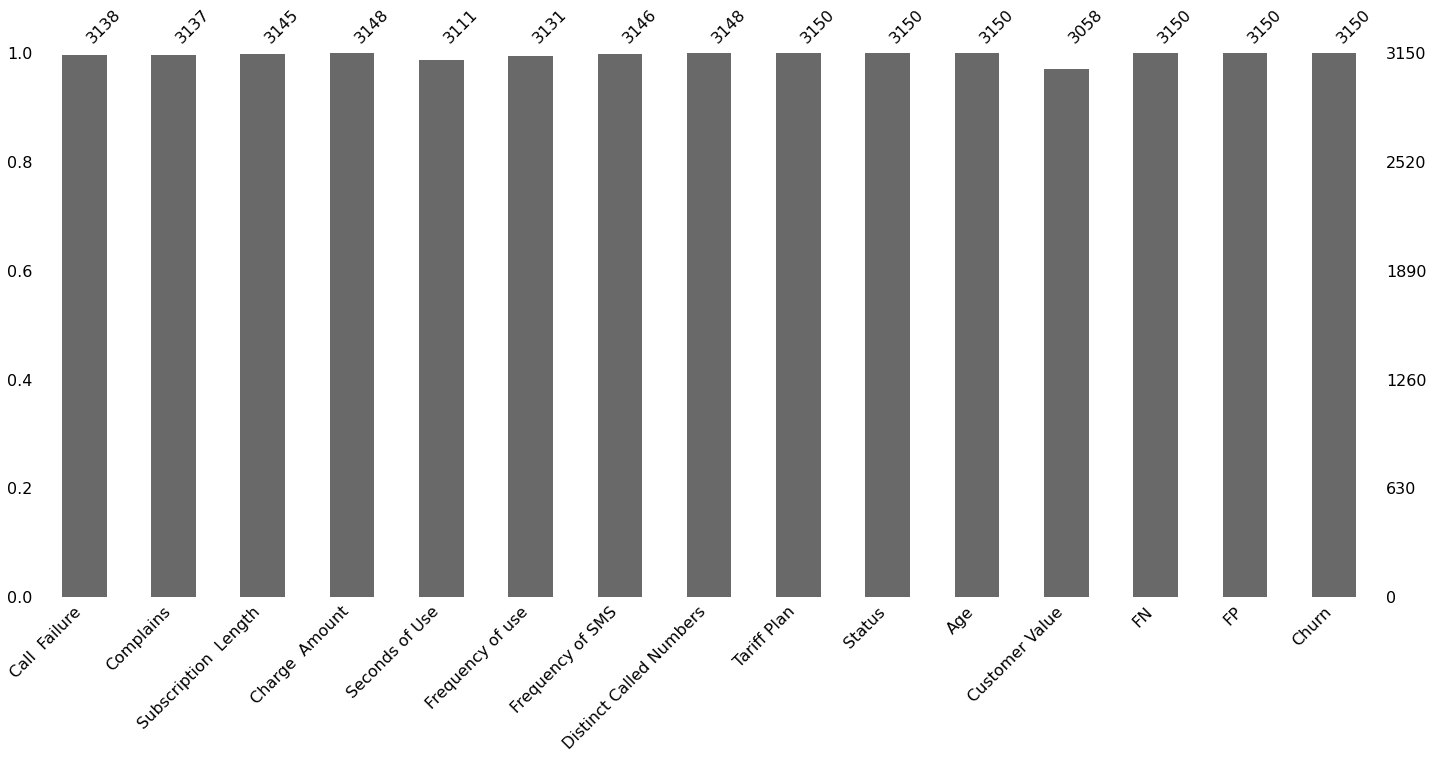

Observation
msno.bar is a simple visualization of nullity by column, here you can see customer value has the most number of null values as the height if that bar is small comapred to the remaining bar plots
Observation
We can see some missing values in the columns


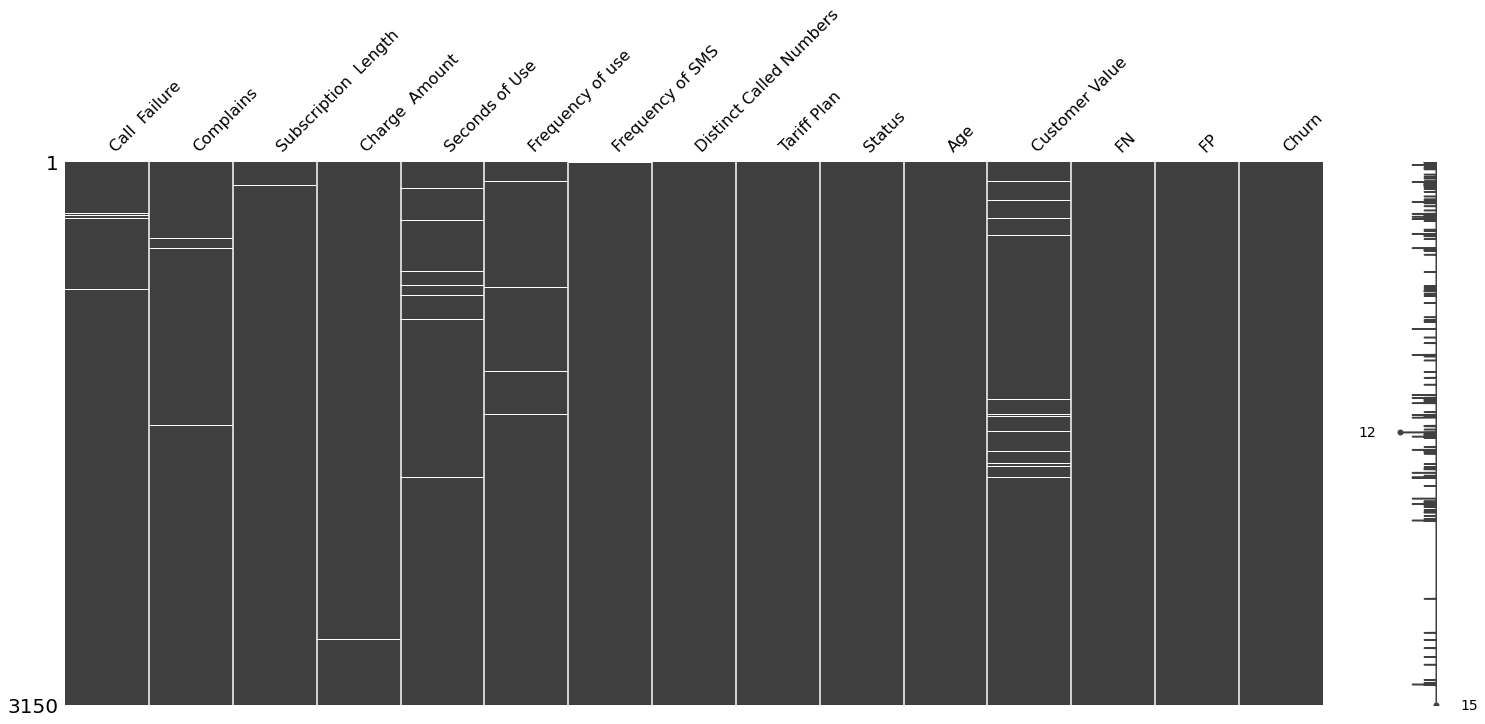

In [60]:
main()